In [115]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate

In [116]:
df1 = pd.read_csv("E:\MDA 2023\Full noise data\Jan\csv_results_42_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df1 = df1[['result_timestamp','laeq']]
df2 = pd.read_csv("E:\MDA 2023\Full noise data\Feb\csv_results_42_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df2 = df2[['result_timestamp','laeq']]
df3 = pd.read_csv("E:\MDA 2023\Full noise data\March\csv_results_44_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df3 = df3[['result_timestamp','laeq']]
df4 = pd.read_csv("E:\MDA 2023\Full noise data\April\csv_results_45_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df4 = df4[['result_timestamp','laeq']]
df5 = pd.read_csv("E:\MDA 2023\Full noise data\May\csv_results_46_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df5 = df5[['result_timestamp','laeq']]
df6 = pd.read_csv("E:\MDA 2023\Full noise data\June\csv_results_47_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df6 = df6[['result_timestamp','laeq']]
df7 = pd.read_csv("E:\MDA 2023\Full noise data\Jul\csv_results_48_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df7 = df7[['result_timestamp','laeq']]
df8 = pd.read_csv("E:\MDA 2023\Full noise data\Aug\csv_results_49_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df8 = df8[['result_timestamp','laeq']]
df9 = pd.read_csv("E:\MDA 2023\Full noise data\Sep\csv_results_50_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df9 = df9[['result_timestamp','laeq']]
df10 = pd.read_csv("E:\MDA 2023\Full noise data\Oct\csv_results_51_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df10 = df10[['result_timestamp','laeq']]
df11 = pd.read_csv("E:\MDA 2023\Full noise data\\Nov\csv_results_52_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df11 = df11[['result_timestamp','laeq']]
df12 = pd.read_csv("E:\MDA 2023\Full noise data\Dec\csv_results_53_255443_mp-06-parkstraat-2-la-filosovia.csv",delimiter=';')
df12 = df12[['result_timestamp','laeq']]
dfn = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], axis=0)

In [117]:
# Convert noise datetime column to a Pandas datetime object
dfn['result_timestamp'] = pd.to_datetime(dfn['result_timestamp'], format="%d/%m/%Y %H:%M:%S.%f")
df_backup = dfn

In [118]:
#dfn = df_backup

In [119]:
# set timestamp column as the index
dfn.set_index('result_timestamp', inplace=True)

In [120]:
# resample to one minute frequency and aggregate using the mean
dfn = dfn.resample('10T').mean()

In [121]:
# Drop the datetime column from the index and reset the index to default
dfn = dfn.reset_index()
dfn

,result_timestamp,laeq
0,2022-01-01 00:00:00,54.790667
1,2022-01-01 00:10:00,48.605833
2,2022-01-01 00:20:00,54.277833
3,2022-01-01 00:30:00,50.025333
4,2022-01-01 00:40:00,48.907333
...,...,...
52555,2022-12-31 23:10:00,52.203333
52556,2022-12-31 23:20:00,54.622833
52557,2022-12-31 23:30:00,56.135667
52558,2022-12-31 23:40:00,59.380333


In [122]:
# Extract minute-in-the-hour feature
#dfn['minute'] = dfn['result_timestamp'].dt.minute.astype('int64')

# Extract hour-in-the-day feature
dfn['hour'] = dfn['result_timestamp'].dt.hour.astype('int64')

# Extract day-in-the-week feature
dfn['weekday'] = dfn['result_timestamp'].dt.dayofweek.astype('int64')

# Extract day-in-the-month feature
dfn['day_of_month'] = dfn['result_timestamp'].dt.day.astype('int64')

# Extract month-in-the-year feature
dfn['month'] = dfn['result_timestamp'].dt.month.astype('int64')

In [123]:
#create numeric columns to merge on
dfn['result_timestamp'] = dfn['result_timestamp'].astype('int64')
dfn

,result_timestamp,laeq,hour,weekday,day_of_month,month
0,1640995200000000000,54.790667,0,5,1,1
1,1640995800000000000,48.605833,0,5,1,1
2,1640996400000000000,54.277833,0,5,1,1
3,1640997000000000000,50.025333,0,5,1,1
4,1640997600000000000,48.907333,0,5,1,1
...,...,...,...,...,...,...
52555,1672528200000000000,52.203333,23,5,31,12
52556,1672528800000000000,54.622833,23,5,31,12
52557,1672529400000000000,56.135667,23,5,31,12
52558,1672530000000000000,59.380333,23,5,31,12


In [124]:
#get weather data
dfw1 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q1.csv")
dfw1 = dfw1[dfw1['ID'] == 'LC-117']
dfw2 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q2.csv")
dfw2 = dfw2[dfw2['ID'] == 'LC-117']
dfw3 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q3.csv")
dfw3 = dfw3[dfw3['ID'] == 'LC-117']
dfw4 = pd.read_csv("E:\MDA 2023\dataverse_files\LC_2022Q4.csv")
dfw4 = dfw4[dfw4['ID'] == 'LC-117']
dfw = pd.concat([dfw1,dfw2,dfw3,dfw4],axis=0)
dfw = dfw[['DATEUTC', 'LC_HUMIDITY', 'LC_DWPTEMP', 'LC_n', 'LC_RAD', 'LC_RAININ', 'LC_DAILYRAIN','LC_WINDDIR',
          'LC_WINDSPEED', 'LC_RAD60', 'LC_TEMP_QCL0','LC_TEMP_QCL1','LC_TEMP_QCL2','LC_TEMP_QCL3']]

dfw['result_timestamp'] = dfw['DATEUTC']
dfw = dfw.drop(['DATEUTC'], axis=1)
dfw['result_timestamp'] = pd.to_datetime(dfw['result_timestamp'],format="%Y-%m-%d %H:%M:%S")
dfw['result_timestamp'] = dfw['result_timestamp'].astype('int64')
dfw = dfw[dfw.isnull()['LC_HUMIDITY']==False]
dfw = dfw[dfw['result_timestamp'].duplicated()==False]
dfw.duplicated().sum()

0

In [125]:
#merge noise and weather data
df = pd.merge(dfn,dfw,on='result_timestamp', validate="1:1")

In [126]:
df['result_timestamp'] = pd.to_datetime(df['result_timestamp'])
df

,result_timestamp,laeq,hour,weekday,day_of_month,month,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,2022-01-01 00:10:00,48.605833,0,5,1,1,87.0,11.29,38.0,0.0,0.0,0.0,0.0,0.00,0.0,13.28,13.28,13.245,13.11754
1,2022-01-01 00:20:00,54.277833,0,5,1,1,87.0,11.22,37.0,0.0,0.0,0.0,0.0,0.00,0.0,13.28,13.28,13.245,13.10622
2,2022-01-01 00:30:00,50.025333,0,5,1,1,87.0,11.22,38.0,0.0,0.0,0.0,43.0,0.04,0.0,13.28,13.28,13.245,13.24006
3,2022-01-01 00:40:00,48.907333,0,5,1,1,87.0,11.22,37.0,0.0,0.0,0.0,23.0,0.01,0.0,13.28,13.28,13.245,13.13870
4,2022-01-01 00:50:00,47.905000,0,5,1,1,87.0,11.22,38.0,0.0,0.0,0.0,0.0,0.00,0.0,13.28,13.28,13.245,13.10622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52547,2022-12-31 23:10:00,52.203333,23,5,31,12,51.0,6.41,38.0,0.0,0.0,0.0,29.0,2.94,0.0,16.61,16.61,16.575,16.55932
52548,2022-12-31 23:20:00,54.622833,23,5,31,12,51.0,6.39,37.0,0.0,0.0,0.0,29.0,2.79,0.0,16.61,16.61,16.575,16.55352
52549,2022-12-31 23:30:00,56.135667,23,5,31,12,51.0,6.38,38.0,0.0,0.0,0.0,30.0,2.47,0.0,16.60,16.60,16.565,16.54640
52550,2022-12-31 23:40:00,59.380333,23,5,31,12,51.0,6.39,37.0,0.0,0.0,0.0,28.0,2.48,0.0,16.50,16.50,16.465,16.44898


In [127]:
# check for missings
df.isnull().sum()

result_timestamp     0
laeq                84
hour                 0
weekday              0
day_of_month         0
month                0
LC_HUMIDITY          0
LC_DWPTEMP           0
LC_n                 0
LC_RAD               0
LC_RAININ            0
LC_DAILYRAIN         0
LC_WINDDIR           0
LC_WINDSPEED         0
LC_RAD60             0
LC_TEMP_QCL0         0
LC_TEMP_QCL1        34
LC_TEMP_QCL2        34
LC_TEMP_QCL3        34
dtype: int64

In [128]:
# only keep rows without missings
df=df[df.isnull()['LC_TEMP_QCL2']==False]
df=df[df.isnull()['laeq']==False]

In [129]:
#doublecheck whether missings are gone
df.isnull().sum()

result_timestamp    0
laeq                0
hour                0
weekday             0
day_of_month        0
month               0
LC_HUMIDITY         0
LC_DWPTEMP          0
LC_n                0
LC_RAD              0
LC_RAININ           0
LC_DAILYRAIN        0
LC_WINDDIR          0
LC_WINDSPEED        0
LC_RAD60            0
LC_TEMP_QCL0        0
LC_TEMP_QCL1        0
LC_TEMP_QCL2        0
LC_TEMP_QCL3        0
dtype: int64

In [130]:
# Drop the datetime column
df_nd = df.drop('result_timestamp', axis=1)

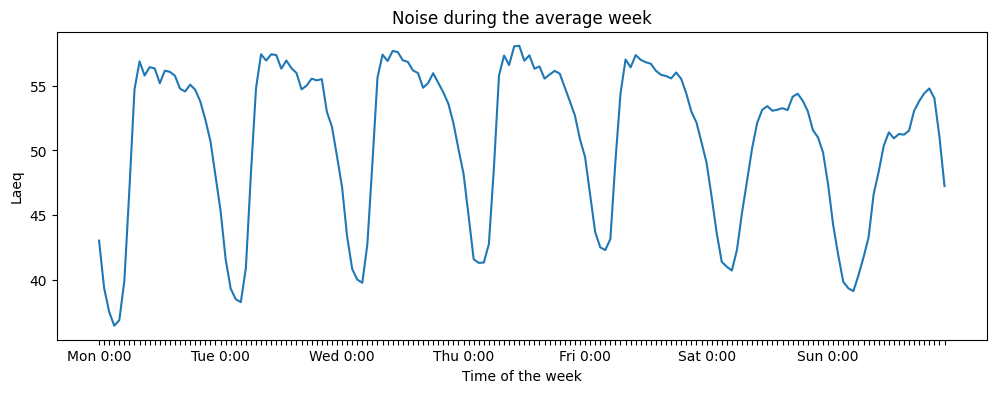

In [131]:
fig, ax = plt.subplots(figsize=(12, 4))
average_week_noise = df_nd.groupby(["weekday", "hour"])["laeq"].mean()
average_week_noise.plot(ax=ax)
_ = ax.set(
    title="Noise during the average week",
    xticks=range(168),
    xticklabels=["Mon 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Tue 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Wed 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Thu 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Fri 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Sat 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                 "Sun 0:00", "", "", "", "", "", "", "", "", "", "", "",
                  "", "", "", "", "", "", "", "", "", "", "", "",
                ],
    xlabel="Time of the week",
    ylabel="Laeq",
)

fig.savefig("Noise_average_week_feb2.png")


In [132]:
#convert noise to relative noise (or relative crowdedness) as target (y), create dataframe with predictors only (X)
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [133]:
#create time-sensitive split for cross-validation
ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=48,
    max_train_size=10000,
    test_size=1000,
)

In [134]:
#inspect splits
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]
X.iloc[test_0]
X.iloc[train_0]

,hour,weekday,day_of_month,month,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
37501,11,6,18,9,68.0,9.21,38.0,43.0,0.0,0.003,32.0,1.17,54.0,14.92,14.92,14.885,14.828373
37502,11,6,18,9,69.0,9.39,37.0,41.0,0.0,0.003,36.0,1.62,53.0,15.03,15.03,14.995,14.914071
37503,11,6,18,9,68.0,9.39,38.0,69.0,0.0,0.003,28.0,2.23,50.0,15.14,15.14,15.105,15.074827
37504,12,6,18,9,67.0,9.02,37.0,41.0,0.0,0.003,36.0,1.98,50.0,15.22,15.22,15.185,15.109959
37505,12,6,18,9,65.0,8.71,38.0,84.0,0.0,0.003,35.0,1.72,49.0,15.26,15.26,15.225,15.186857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47497,21,5,26,11,89.0,5.56,38.0,0.0,0.0,0.000,0.0,0.00,0.0,7.23,7.23,7.195,7.346287
47498,21,5,26,11,90.0,5.66,37.0,0.0,0.0,0.000,0.0,0.00,0.0,7.22,7.22,7.185,7.350851
47499,21,5,26,11,89.0,5.50,38.0,0.0,0.0,0.000,0.0,0.00,0.0,7.22,7.22,7.185,7.293760
47500,22,5,26,11,89.0,5.50,37.0,0.0,0.0,0.000,0.0,0.00,0.0,7.22,7.22,7.185,7.308380


In [135]:
train_4, test_4 = all_splits[4]
X.iloc[test_4]
X.iloc[train_4]

,hour,weekday,day_of_month,month,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
41501,6,6,16,10,91.0,11.72,37.0,0.0,0.0,0.000,0.0,0.0,0.0,13.11,13.11,13.075,13.06356
41502,6,6,16,10,91.0,11.72,37.0,0.0,0.0,0.000,0.0,0.0,0.0,13.11,13.11,13.075,13.06356
41503,6,6,16,10,91.0,11.73,38.0,0.0,0.0,0.000,0.0,0.0,0.0,13.11,13.11,13.075,13.06780
41504,6,6,16,10,92.0,11.78,37.0,0.0,0.0,0.000,0.0,0.0,0.0,13.11,13.11,13.075,13.08094
41505,6,6,16,10,92.0,11.78,38.0,0.0,0.0,0.000,0.0,0.0,0.0,13.11,13.11,13.075,13.08094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51497,16,5,24,12,87.0,8.80,38.0,0.0,0.0,0.007,0.0,0.0,0.0,10.91,10.91,10.875,10.69245
51498,16,5,24,12,87.0,8.81,37.0,0.0,0.0,0.007,0.0,0.0,0.0,10.82,10.82,10.785,10.59322
51499,16,5,24,12,88.0,8.83,38.0,0.0,0.0,0.007,0.0,0.0,0.0,10.75,10.75,10.715,10.51535
51500,16,5,24,12,89.0,8.91,37.0,0.0,0.0,0.007,0.0,0.0,0.0,10.70,10.70,10.665,10.46005


In [136]:
#run histogram gradient boosting model
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

gbrt_pipeline = make_pipeline(HistGradientBoostingRegressor()).set_output(transform="pandas")

evaluate(gbrt_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.033 +/- 0.009
Root Mean Squared Error: 0.042 +/- 0.010


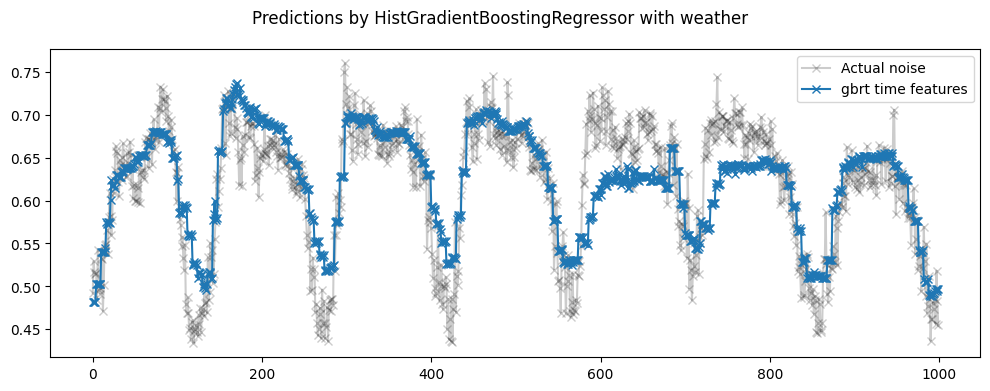

In [137]:
#Qualitative analysis of the impact of features on linear model predictions
gbrt_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_0])

last_hours = slice(-1000, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by HistGradientBoostingRegressor with weather")
ax.plot(
    y.iloc[test_0].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual noise",
    color="black",
)
ax.plot(gbrt_predictions[last_hours], "x-", label="gbrt time features")
_ = ax.legend()


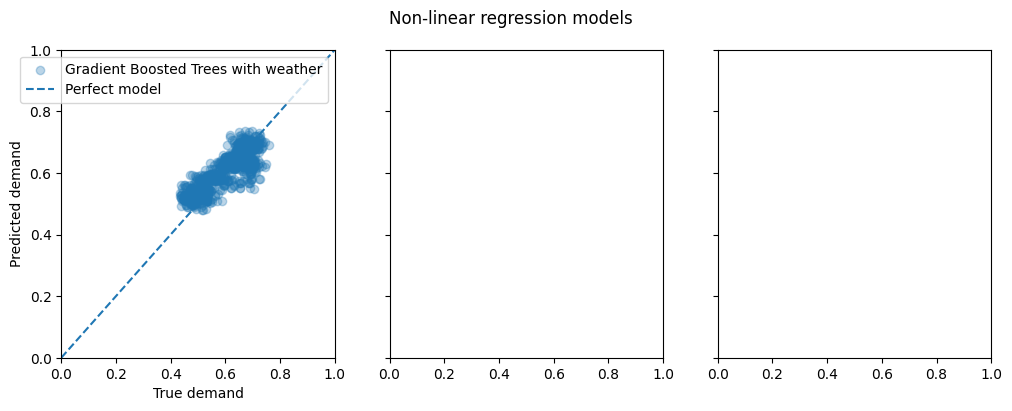

In [138]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    gbrt_predictions,
]
labels = [
    "Gradient Boosted Trees with weather",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_0].values, pred, alpha=0.3, label=label)
    ax.plot([0, 1], [0, 1], "--", label="Perfect model")
    ax.set(
        xlim=(0, 1),
        ylim=(0, 1),
        xlabel="True demand",
        ylabel="Predicted demand",
    )
    ax.legend()

plt.show()